In [7]:
import os
import sqlalchemy
from dotenv import load_dotenv
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import pandas as pd


load_dotenv()

engine = create_engine(os.getenv("DATABASE_URL"))


In [8]:
pd.read_sql_query("SELECT 1 AS ok;", engine)

,ok
0,1


In [9]:
sql = """
Select c.name as Countries_twoOrMore_Languages,
Count (cl.language) as Number_Languages_Spoken
From country c
Join countrylanguage cl
ON c.code = cl.countrycode
where cl.isofficial = 'T'
Group by c.name
Having Count(cl.language) > 2
Order by Number_Languages_Spoken DESC;
"""

df = pd.read_sql_query(sql, engine)

df


,countries_twoormore_languages,number_languages_spoken
0,Switzerland ...,4
1,South Africa ...,4
2,Vanuatu ...,3
3,Belgium ...,3
4,Luxembourg ...,3
5,Peru ...,3
6,Bolivia ...,3
7,Singapore ...,3


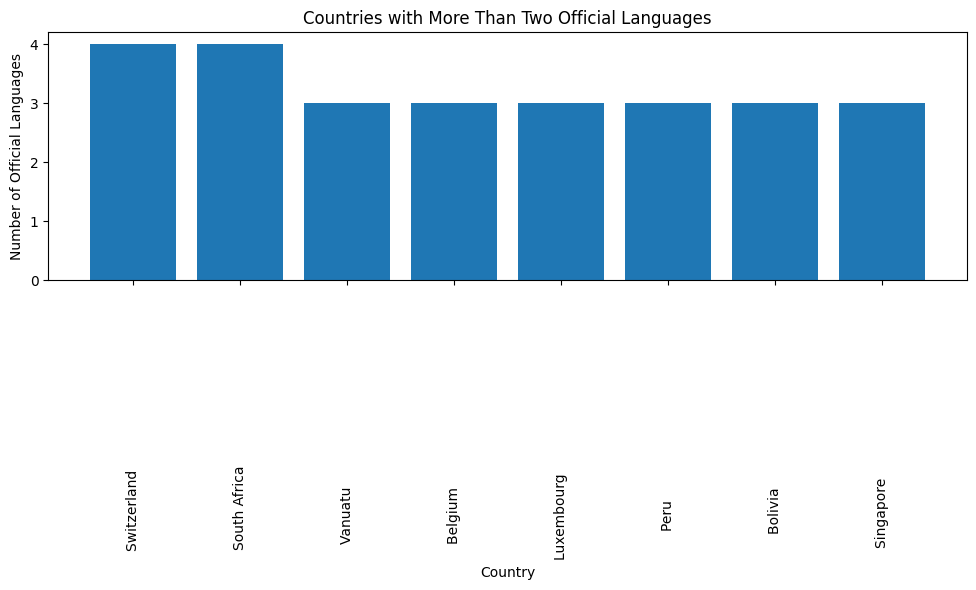

In [10]:
plt.figure(figsize=(10, 6))

plt.bar(df["countries_twoormore_languages"], 
        df["number_languages_spoken"])

plt.title("Countries with More Than Two Official Languages")
plt.xlabel("Country")
plt.ylabel("Number of Official Languages")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
